In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
import string

data = pd.read_pickle('final cleaned data input.pkl')

In [2]:
data

,label,embedding
0,0,"[-0.05897091, 0.7467163, 0.12007665, -0.089397..."
1,0,"[-0.061586715, 0.7604908, 0.1392199, -0.104760..."
2,0,"[-0.10851683, 0.7752616, 0.14976382, -0.104643..."
3,0,"[-0.052161153, 0.7419824, 0.12117264, -0.12810..."
4,0,"[-0.19041927, 0.8224487, 0.19883856, -0.129845..."
...,...,...
1599994,1,"[-0.07834225, 0.7578769, 0.13168366, -0.095357..."
1599995,1,"[-0.067673355, 0.78380316, 0.11528052, -0.1562..."
1599996,1,"[-0.10851683, 0.7752616, 0.14976382, -0.104643..."
1599997,1,"[-0.07834225, 0.7578769, 0.13168366, -0.095357..."


In [3]:
# extracts column "feature_float_list_re" and shapes it into a N x 50 array
X = np.stack(data['embedding'].values)
X.shape

(1599999, 50)

In [4]:
y = data['label']
y = y.to_numpy()
y.shape

(1599999,)

In [5]:
# !pip install seaborn

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your labels

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # No need for target_names if you're okay with numerical labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(data['label'].unique()), # Use unique numerical labels for x-axis
            yticklabels=sorted(data['label'].unique())) # Use unique numerical labels for y-axis
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=None)  # You can adjust max_depth for tuning
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # You can set this to limit tree depth
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)  # 'linear' kernel is good for text data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


# Multi Layer Perceptron

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the MLP model
model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # Activation function for hidden layer ('relu' is common)
    solver='adam',              # Optimizer ('adam' is good for most cases)
    max_iter=300,               # Number of training epochs
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.5495



Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.38      0.45     79812
           1       0.54      0.72      0.62     80188

    accuracy                           0.55    160000
   macro avg       0.56      0.55      0.54    160000
weighted avg       0.56      0.55      0.54    160000



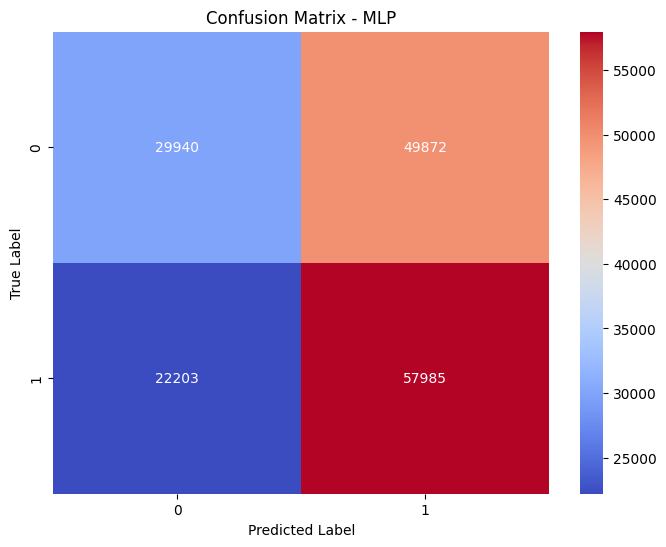

In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP')
plt.show()